#  Random forest Algorithm

* Leo Breiman and Adele Cutler are the inventors of the widely-used machine learning technique known as random forest, which mixes the output of various decision trees to produce a single conclusion. Its widespread use is motivated by its adaptability and usability because it can solve classification and regression issues.
* As suggested by its name, Random Forest is a collection of different decision tree algorithms that uses random sampling.
* The decision tree algorithm's drawbacks are eliminated by this 	algorithm.
* The concept of Breiman's "bagging" is combined with a random selection of elements to create random forest. By using the average or mode of the results from several decision trees, the forecast is meant to be more precise. The more decision trees that are taken into account, the more precise the results will be.
* Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called **Bootstrap**.

### Bagging: 
  * An ensemble meta-estimator called a bagging classifier fits base classifiers one at a time to random subsets of the original dataset, and then it aggregates the individual predictions (either by voting or by averaging) to provide a final prediction.
  * By adding randomization to the process of building a black-box estimator (such a decision tree), a meta-estimator of this kind can often be used to lower the variance of the estimator.
![bagging.png](attachment:bagging.png)
* By voting or averaging, bagging minimises overfitting (variance); however, this increases bias, which is offset by the decrease in variance.

* To achieve the required result, Random Forest uses the bagging process.
* The idea is to repeatedly use different training data samples while applying the decision tree algorithm to the dataset.
* These decision trees' outputs will vary and may be skewed as a result of the training data they received. The ultimate result can therefore be regarded as the mean or mode of the results obtained from each individual decision tree. Thus, variance can be minimised. Replacement can be used to do the sampling. The highest-ranking decision tree output will be the ultimate result of the Random Forest algorithm. As a result, the output will be more stable and less skewed.

![bagging1.png](attachment:bagging1.png)

Steps used:

1: Selecting random data points (K) from the training set.

2: Building the decision trees associated with the selected data points (subsets).

3: Choosing the number (N) for decision trees that we want to build.

4: Repeating Step 1 & 2.

5: For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes.

### Importance of Random Forest Algorithm

* Used for both regression and classification models of machine learning.
* Can handle missing values in the dataset.
* Do not overfit the model like decision tree and can be used for categorical variables also. Random forest adds randomness to the model.
* Searches for the best feature using a random subset of features for trees.
* And then generate the output based on the most ranked output of subset decision trees.

### Advantages

* Used for both regression and classification types of problems. Easy to use. Overfitting is not a problem in the random forest algorithm.
* Can be used to identify the most important feature among available features. 
* Has high accuracy, flexibility, and less variance.

### Disadvantages

* As the number of trees increases, the algorithm becomes slow and ineffective in handling real-time scenarios.
* Random forest takes more time in comparison to the decision tree.
* Requires more resources for computation.

### Python Implementation of Random Forest Algorithm

In [ ]:
# importing libraries  
import numpy as nm  
import pandas as pd  
import seaborn as snp
import matplotlib.pyplot as mtp

In [ ]:
#importing datasets  
data_set= pd.read_csv('User_Data.csv')  

In [ ]:
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In the above code, the classifier object takes below parameters:

**n_estimators**= The required number of trees in the Random Forest. The default value is 10. We can choose any number but need to take care of the overfitting issue.

**criterion**= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
# Output
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
cm


array([[65,  3],
       [ 4, 28]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


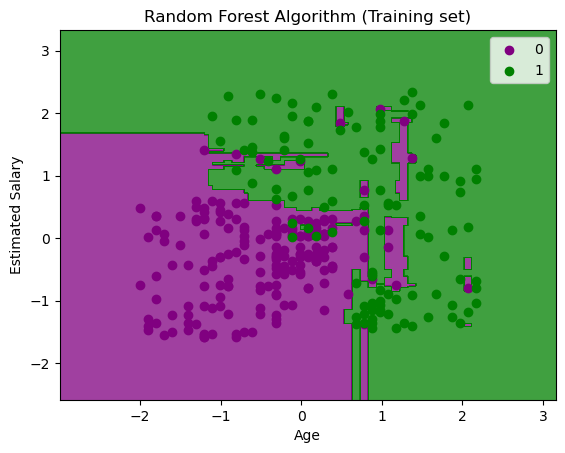

In [ ]:
# Visualizing the training Set result
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Random Forest Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


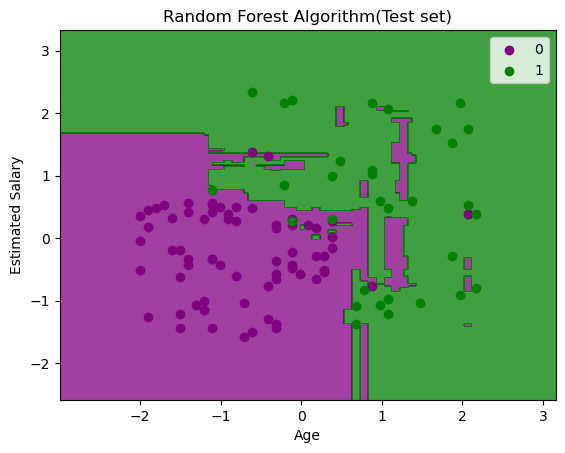

In [ ]:
# Visualizing the test set result
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Random Forest Algorithm(Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  